I decided to deal with continuous output data by replacing it by intervals of values, in this case the number of intervals is 10.

In [1]:
import numpy as np
import pandas as pd


dataset = 'SPECTF.dat'
df = pd.read_csv(dataset,header=None)

X = np.array(df.iloc[:,:-1])
Y = np.array(df.iloc[:,0])
df[:5]

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41


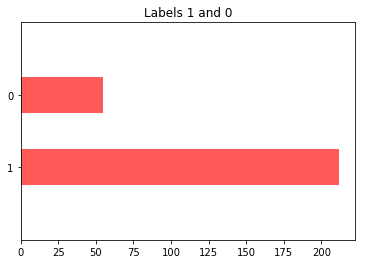

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
fig, ax = plt.subplots()
df[0].value_counts().plot(kind="barh", color="red", alpha=.65)
ax.set_ylim(-1, len(df[0].value_counts())) 
plt.title("Labels 1 and 0")
plt.show()

# Shahane's Desicion Tree and Random Forest Classifiers

In [29]:
import runner as rn
stats = rn.evaluate_performance(X,y)
print ("Decision Tree Accuracy = ", stats[0, 0], " (", stats[0, 1], ")")
print ("Random Forest Tree Accuracy = ", stats[1, 0], " (", stats[1, 1], ")")

0


C:\Users\Shahane\ML Course\Untitled Folder\random_forest.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rand = data[np.random.randint(data.shape[0], size=data.shape[0]*self.ratio_per_tree), :]


10
20
30
40
50
60
70
80
90
Decision Tree Accuracy =  68.8083832335  ( 16.5761428228 )
Random Forest Tree Accuracy =  77.7305389222  ( 4.82375749597 )


In [20]:
from sklearn.model_selection import train_test_split

train, test, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=1)

train_l = len(train)
test_l = len(test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score


clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=10, min_samples_leaf=5, 
                             min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                             bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
                             class_weight=None) #Initialize with whatever parameters you want to

clf.fit(train,train_y)

pred_clf = clf.score(test, test_y)


log = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
    intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=3,
    penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
    verbose=0, warm_start=False)
        
log.fit(train,train_y)

pred_log = log.score(test, test_y)



dec = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                             max_leaf_nodes=None, min_impurity_split=1e-07, class_weight=None, presort=False)

dec.fit(train,train_y)

pred_dec = dec.score(test, test_y)


print('Sklearn Random Forest accuracy: %f' % scores_ran)
print('Sklearn Decision Tree accuracy: %f' % scores_dec)
print('Sklearn Logistic Regression accuracy: %f' % scores_log)

Sklearn Random Forest accuracy: 0.944444
Sklearn Decision Tree accuracy: 1.000000
Sklearn Logistic Regression accuracy: 0.981481


# Report table

In [28]:
from collections import OrderedDict


report = [{'dataset': dataset, 'Training set size': train_l, 'Test set size': test_l, 'Classifier Type': 'Logistic Regression', 'Classifier Accuracy': scores_log},
          {'dataset': dataset, 'Training set size': train_l, 'Test set size': test_l, 'Classifier Type': 'Desicion Tree', 'Classifier Accuracy': scores_dec},
         {'dataset': dataset, 'Training set size': train_l, 'Test set size': test_l, 'Classifier Type': 'Random Forest', 'Classifier Accuracy': scores_ran},
         {'dataset': dataset, 'Training set size': train_l, 'Test set size': test_l, 'Classifier Type': "Shahane's Desicion tree", 'Classifier Accuracy': "68.8084"},
         {'dataset': dataset, 'Training set size': train_l, 'Test set size': test_l, 'Classifier Type': "Shahane's Random Forest", 'Classifier Accuracy': "77.7305"}]
df_report = pd.DataFrame(report)
df_report

,Classifier Accuracy,Classifier Type,Test set size,Training set size,dataset
0,0.981481,Logistic Regression,54,213,SPECTF.dat
1,1,Desicion Tree,54,213,SPECTF.dat
2,0.944444,Random Forest,54,213,SPECTF.dat
3,68.8084,Shahane's Desicion tree,54,213,SPECTF.dat
4,77.7305,Shahane's Random Forest,54,213,SPECTF.dat
